## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Read through the code in the following sections:
    * [MNIST Data](#MNIST-Data)
    * [Convolutional Neural Network Model](#Convolutional-Neural-Network-Model)
    * [Train Model](#Train-Model)
    * [Validation](#Validation)
0. Complete the [Exercise](#Exercise)

In [1]:
# allow matplotlib graphics to display in the notebook
%matplotlib inline
import matplotlib.pyplot

# import numpy, for image dimension manipulation
import numpy

# import validation methods from scikit-learn
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# import the dataset and neural network layers from keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

## MNIST Data
[MNIST](https://en.wikipedia.org/wiki/MNIST_database) is a famous dataset of images of handwritten numbers. The goal is to be able to figure out which number is in the image.

In [2]:
# constants to describe the MNIST images
NUM_ROWS = 28 
NUM_COLUMNS = 28
NUM_COLORS = 1
IMG_SHAPE = (NUM_ROWS, NUM_COLUMNS, NUM_COLORS)

# constant to describe the MNIST output labels
# there are ten different numbers, 0-9
NUM_CLASSES = 10

In [3]:
# load the data
((images_train, labels_train), (images_test, labels_test)) = mnist.load_data()

Let's take a look at one particular image and its label, to better understand the dataset.

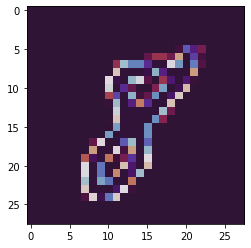

In [4]:
matplotlib.pyplot.imshow(images_train[17], cmap='twilight_shifted_r')

In [5]:
labels_train[17]

8

## Convolutional Neural Network Model

In [6]:
model = Sequential()

# convolutional layers
model.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=8, kernel_size=3, strides=2, padding='same'))
model.add(Conv2D(filters=6, kernel_size=3, strides=2, padding='same'))

# dense layers to consolidate information
model.add(Flatten())
model.add(Dense(units=8, activation='tanh'))

# output layer to make the final decision on which number it is
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

## Train Model

In [7]:
# keras requires a color dimension, so we need to expand each image to have one
images_3d_train = numpy.expand_dims(images_train, axis=3)

# the labels need to be one-hot encoded, to match the ten outputs of our model
labels_onehot_train = to_categorical(labels_train)

# set up the model to be ready for training
model.compile(optimizer=SGD(), loss='categorical_crossentropy')

# fit the model to the training data
model.fit(images_3d_train, labels_onehot_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6090
Epoch 2/2
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5035


## Validation

In [8]:
# keras requires a color dimension, so we need to expand each image to have one
images_3d_test = numpy.expand_dims(images_test, axis=3)

# get the predictions from the model
predictions_test_onehot = model.predict(images_3d_test)

# get the index that has the highest probability
predictions_test = numpy.argmax(predictions_test_onehot, axis=1)

In [9]:
# get the overall accuracy
accuracy_score(y_true=labels_test, y_pred=predictions_test)

0.5451

In [10]:
# get precision, recall, f-score, and number of examples of each digit
# can you see which digits are easiest for the model, and which are hardest? looks to be struggling with 5 and 8
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test)

(array([0.50462487, 0.61304623, 0.77220077, 0.43245175, 0.55588453,
        0.56422018, 0.66868932, 0.73495248, 0.37167139, 0.59854015]),
 array([0.50102041, 0.85286344, 0.19379845, 0.5990099 , 0.76476578,
        0.13789238, 0.57515658, 0.6770428 , 0.67351129, 0.40634291]),
 array([0.50281618, 0.71333825, 0.30983734, 0.50228311, 0.64380626,
        0.22162162, 0.61840629, 0.70481013, 0.47900694, 0.48406139]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

## Exercise

Can you get the model to perform better? Try adding more layers, or taking them away. 
Take a look at the documentation for the [convolutional](https://keras.io/layers/convolutional/) and [dense](https://keras.io/layers/core/) layers and the [sequential model](https://keras.io/models/sequential/) to understand the options that you have and try out different things.

It might also be a good idea to find examples posted online of networks that did well with MNIST and try out some of the configuration they used. Make sure you cite any sources you use!

Take notes of what performance you get from different configurations.


Comment on what patterns you observed in terms of what changes helped your model.

In [11]:
###########
#   def   #
###########

model2 = Sequential()

# convolutional layers
model2.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=4, kernel_size=6, strides=2, padding='same')) # focus on bigger features, 
# model2.add(Dropout(0.2))
model2.add(Conv2D(filters=8, kernel_size=2, strides=2, padding='same')) # then look closer

# dense layers to consolidate information
model2.add(Flatten())
model2.add(Dense(units=8, activation='tanh'))

# output layer to make the final decision on which number it is
model2.add(Dense(units=NUM_CLASSES, activation='softmax'))


In [12]:

#############
#   train   #
#############

# keras requires a color dimension, so we need to expand each image to have one
images_3d_train = numpy.expand_dims(images_train, axis=3)

# the labels need to be one-hot encoded, to match the ten outputs of our model
labels_onehot_train = to_categorical(labels_train)

# set up the model to be ready for training
model2.compile(optimizer=Adam(), loss='categorical_crossentropy') # Adam converges faster, better with only 2 epochs

# fit the model to the training data
model2.fit(images_3d_train, labels_onehot_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 18s 10ms/step - loss: 1.2386
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7366


In [13]:
#############
#   score   #
#############

# keras requires a color dimension, so we need to expand each image to have one
images_3d_test = numpy.expand_dims(images_test, axis=3)

# get the predictions from the model
predictions_test_onehot = model2.predict(images_3d_test)

# get the index that has the highest probability
predictions_test = numpy.argmax(predictions_test_onehot, axis=1)

# get the overall accuracy
accuracy_score(y_true=labels_test, y_pred=predictions_test)

0.8109

# Configurations

Top score: 0.808

---

Adam seems to work best

More convolutional layers seems to work worse, maybe because we only have two epochs

Removing the dropout made it work better, at least with only a few layers

More dense layers seemed to work worse

looking large then small seemed to work better than looking small then large

Less filters seems to work better! Final try pushed previous learnings to the extreme, and worked best!


In [14]:
# # convolutional layers
# model2.add(Conv2D(input_shape=IMG_SHAPE,
#                  filters=12, kernel_size=3, strides=2, padding='same'))
# model2.add(Conv2D(filters=6, kernel_size=6, strides=2, padding='same'))
# model2.add(Dropout(0.3))
# model2.add(Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))


# # dense layers to consolidate information
# model2.add(Flatten())
# model2.add(Dense(units=12, activation='tanh'))
# model2.add(Dense(units=8, activation='tanh'))

# # 0.65, adam op


# # convolutional layers
# model2.add(Conv2D(input_shape=IMG_SHAPE,
#                  filters=8, kernel_size=3, strides=2, padding='same'))
# model2.add(Conv2D(filters=12, kernel_size=2, strides=2, padding='same'))
# model2.add(Dropout(0.3))
# model2.add(Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))
# model2.add(Dropout(0.3))
# model2.add(Conv2D(filters=6, kernel_size=6, strides=2, padding='same'))

# # dense layers to consolidate information
# model2.add(Flatten())
# model2.add(Dense(units=12, activation='tanh'))
# model2.add(Dense(units=8, activation='tanh'))

# # # 0.75, adam op


# # convolutional layers
# model2.add(Conv2D(input_shape=IMG_SHAPE,
#                  filters=12, kernel_size=6, strides=2, padding='same'))
# model2.add(Conv2D(filters=16, kernel_size=2, strides=2, padding='same'))
# model2.add(Dropout(0.3))
# model2.add(Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))


# # dense layers to consolidate information
# model2.add(Flatten())
# # model2.add(Dense(units=12, activation='tanh'))
# model2.add(Dense(units=8, activation='tanh'))

# # # 0.7



# # convolutional layers
# model2.add(Conv2D(input_shape=IMG_SHAPE,
#                  filters=6, kernel_size=6, strides=2, padding='same'))
# model2.add(Conv2D(filters=16, kernel_size=3, strides=2, padding='same'))
# model2.add(Dropout(0.3))
# model2.add(Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))


# # dense layers to consolidate information
# model2.add(Flatten())
# # model2.add(Dense(units=12, activation='tanh'))
# model2.add(Dense(units=8, activation='tanh'))

# # # 0.74 


# # convolutional layers
# model2.add(Conv2D(input_shape=IMG_SHAPE,
#                  filters=6, kernel_size=6, strides=2, padding='same'))
# # model2.add(Dropout(0.2))
# model2.add(Conv2D(filters=12, kernel_size=3, strides=2, padding='same'))

# # # 0.76


# model2 = Sequential()

# # convolutional layers
# model2.add(Conv2D(input_shape=IMG_SHAPE,
#                  filters=6, kernel_size=6, strides=2, padding='same')) # focus on bigger features, 
# # model2.add(Dropout(0.2))
# model2.add(Conv2D(filters=8, kernel_size=3, strides=2, padding='same')) # then look closer

# # dense layers to consolidate information
# model2.add(Flatten())
# model2.add(Dense(units=8, activation='tanh'))

# # output layer to make the final decision on which number it is
# model2.add(Dense(units=NUM_CLASSES, activation='softmax'))

# # # 0.77


# # convolutional layers
# model2.add(Conv2D(input_shape=IMG_SHAPE,
#                  filters=4, kernel_size=6, strides=2, padding='same')) # focus on bigger features, 
# # model2.add(Dropout(0.2))
# model2.add(Conv2D(filters=8, kernel_size=3, strides=2, padding='same')) # then look closer

# # dense layers to consolidate information
# model2.add(Flatten())
# model2.add(Dense(units=8, activation='tanh'))

# # # 0.78

# # convolutional layers
# model2.add(Conv2D(input_shape=IMG_SHAPE,
#                  filters=4, kernel_size=6, strides=2, padding='same')) # focus on bigger features, 
# # model2.add(Dropout(0.2))
# model2.add(Conv2D(filters=8, kernel_size=2, strides=2, padding='same')) # then look closer

# # # 0.808